## Task #4: Apply DBSCAN

In [4]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import plotly.express as px 

from sklearn.preprocessing import StandardScaler
# DBSCAN
from sklearn.cluster import DBSCAN

# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score, silhouette_samples

#import folium

#import nltk

In [109]:
data_cleaned = pd.read_table("./data/cleaned-data.csv", sep=",")
data_sample = data_cleaned.sample(5000)

In [110]:
# we will keep only the lat and long columns for clustering

#Columns to drop
columns_to_drop = ['id', 'user', 'tags', 'title',  'date_taken_minute', 'date_taken_hour', 'date_taken_day', 'date_taken_month', 'date_taken_year', 'date_upload_minute', 'date_upload_hour', 'date_upload_day', 'date_upload_month', 'date_upload_year', 'Unnamed: 16',	'Unnamed: 17',	'Unnamed: 18']
df_clustering = data_sample.drop(columns_to_drop , axis=1)

df_clustering.head()

,lat,long
169990,45.837622,4.826544
161249,45.761083,4.826616
72738,45.757807,4.866043
103023,45.711798,4.869582
175343,45.758376,4.839756


In [111]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[ 2.45648885 -0.41042848]
 [-0.25411222 -0.40816032]
 [-0.37013058  0.83387646]
 ...
 [-1.36552984  3.59920157]
 [-1.27377051  3.56785689]
 [-0.0273877  -0.19363042]]


,lat,long
0,2.456489,-0.410428
1,-0.254112,-0.408160
2,-0.370131,0.833876
3,-1.999523,0.945363
4,-0.349980,0.005778


In [112]:
# ANSWER
min_pnts = 4

In [113]:
def find_optimal_eps(data, min_pts):
    # Calculate distances to k-nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    
    # Sort distances to kth neighbor in ascending order
    k_distances = np.sort(distances[:, min_pts-1])
    
    # Create plot
    fig = px.line(
        x=range(len(k_distances)),
        y=k_distances,
        title=f'K-distance Graph (k={min_pts})',
        labels={'x': 'Points sorted by distance', 
                'y': f'Distance to {min_pts}th nearest neighbor'}
    )
    
    return fig

In [114]:
# ANSWER
fig = find_optimal_eps(scaled_data, min_pnts)
fig.show() # display the plot

In [115]:
# ANSWER
best_eps = 0.13
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_dbscan.fit_predict(scaled_data)

In [116]:
data_sample['cluster dbscan'] = best_labels
data_sample['silhouette dbscan'] = silhouette_samples(scaled_data, best_labels, metric='euclidean')
data_sample

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,cluster dbscan,silhouette dbscan
169990,31986831997,40936370@N00,45.837622,4.826544,"360,360°,panorama,visitevirtuelle,vr,abodeofch...",360° EXT | 1999-2019,8.0,12,20,12,...,13,15,30.0,1,2019.0,NaN,NaN,NaN,0,0.962719
161249,42297975494,32279917@N08,45.761083,4.826616,france,IMG_20180618_175809555,58.0,17,18,6,...,56,9,26.0,6,2018.0,NaN,NaN,NaN,1,0.094291
72738,9696998206,30937382@N02,45.757807,4.866043,"square,squareformat,iphoneography,instagramapp...",Les écrits secrets de #Gallifrey #Shada #Docto...,40.0,23,7,9,...,40,23,7.0,9,2013.0,NaN,NaN,NaN,1,-0.682267
103023,16730938458,123834818@N02,45.711798,4.869582,"sncf,ter,dépôt,vénissieux,55500,regio2n,régio2...",Z 55539/55540 (020C),20.0,17,24,3,...,59,18,24.0,3,2015.0,NaN,NaN,NaN,-1,-0.949935
175343,32719485687,144587577@N06,45.758376,4.839756,"lyon,france,cygne,swan,eau,water,head,tête,nat...",Tête de cygne dans l'eau,11.0,19,20,4,...,2,0,22.0,4,2019.0,NaN,NaN,NaN,1,0.406900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119641,24289608745,86250667@N08,45.763083,4.812769,"architecture,lyon,tombe,cimetière","2015-11-08 - Lyon, Cimetière de Loyasse (329),...",36.0,17,8,11,...,52,11,10.0,1,2016.0,NaN,NaN,NaN,1,-0.711923
135318,31125596223,49301145@N02,45.815636,4.847386,NaN,"Paul Bocuse Restaurant, Lyon",44.0,23,8,10,...,31,13,28.0,12,2016.0,NaN,NaN,NaN,-1,-0.766596
178148,46931411435,141049952@N08,45.729700,4.953825,"japantouch,aoisoracosplay,japactu,japactuinfo,...",Concours cosplay de la Japan Touch 2019,17.0,16,4,5,...,25,23,14.0,5,2019.0,NaN,NaN,NaN,6,0.931895
186179,31972927588,12590900@N03,45.732291,4.952830,"panhardlevassor,panhard,epoquauto2018",Panhard & Levassor. Le bolide de 35 cv et 220 ...,1.0,20,8,11,...,31,14,12.0,11,2018.0,NaN,NaN,NaN,6,0.925065


In [117]:
# ANSWER
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

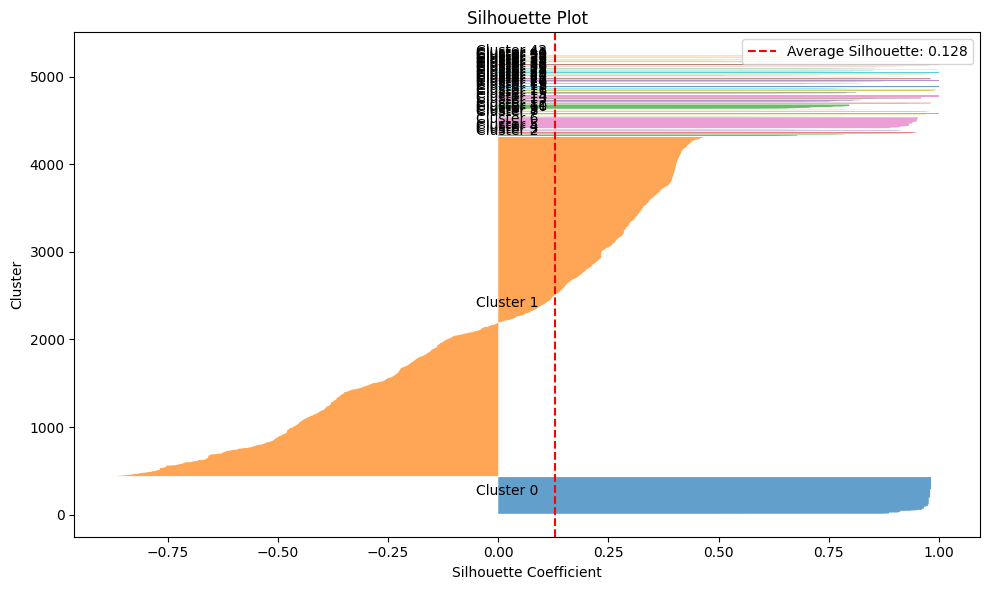

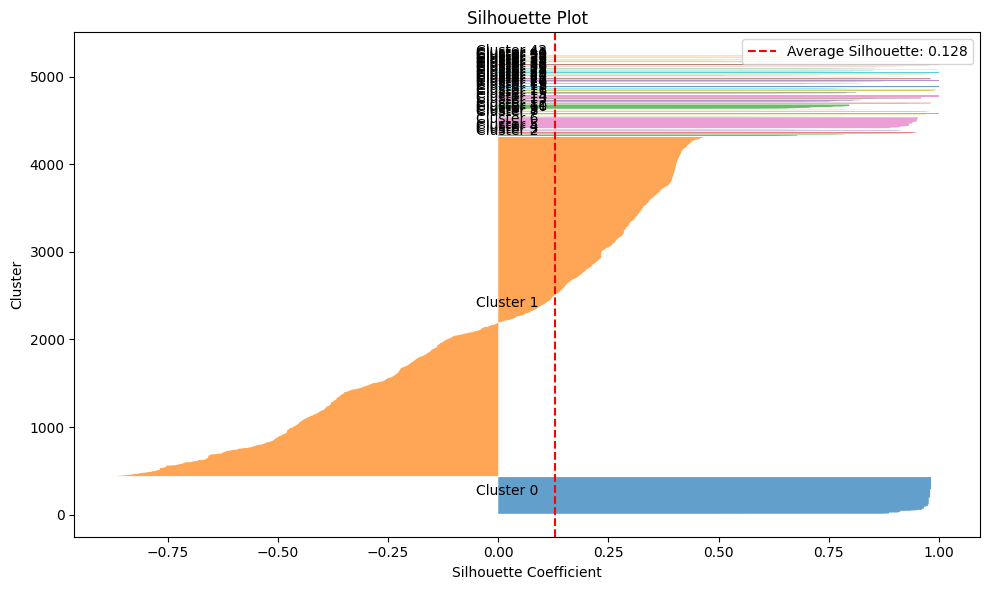

In [118]:
plot_silhouette(data_sample['silhouette dbscan'].values, silhouette_score(scaled_data, best_labels, metric='euclidean'), best_labels, n_clusters=len(set(best_labels)) - (1 if -1 in best_labels else 0))

In [119]:
data_sample.groupby('cluster dbscan')['silhouette dbscan'].mean()

cluster dbscan
-1    -0.861388
 0     0.969958
 1    -0.017600
 2     0.698252
 3     0.921010
 4     0.860818
 5     0.617909
 6     0.936172
 7     0.678167
 8     0.951179
 9     1.000000
 10    0.970076
 11    0.773578
 12    0.738323
 13    0.970290
 14    0.781915
 15    0.940931
 16    1.000000
 17    0.765624
 18    0.988305
 19    0.784030
 20    1.000000
 21    1.000000
 22    0.781960
 23    0.854018
 24    1.000000
 25    0.961803
 26    0.896997
 27    0.623132
 28    0.972734
 29    1.000000
 30    0.816039
 31    0.995004
 32    0.806945
 33    0.888551
 34    0.978417
 35    1.000000
 36    1.000000
 37    0.912910
 38    0.533571
 39    0.765020
 40    0.993734
 41    0.844823
 42    0.644132
Name: silhouette dbscan, dtype: float64

## Task #4.1: Apply DBSCAN on the first two clusters

In [120]:
# filtering the cluster 0 and 1

filtered_data_dsbcan = data_sample[(data_sample['cluster dbscan'] == 0) | (data_sample['cluster dbscan'] == 1)]
filtered_data_dsbcan

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,cluster dbscan,silhouette dbscan
169990,31986831997,40936370@N00,45.837622,4.826544,"360,360°,panorama,visitevirtuelle,vr,abodeofch...",360° EXT | 1999-2019,8.0,12,20,12,...,13,15,30.0,1,2019.0,NaN,NaN,NaN,0,0.962719
161249,42297975494,32279917@N08,45.761083,4.826616,france,IMG_20180618_175809555,58.0,17,18,6,...,56,9,26.0,6,2018.0,NaN,NaN,NaN,1,0.094291
72738,9696998206,30937382@N02,45.757807,4.866043,"square,squareformat,iphoneography,instagramapp...",Les écrits secrets de #Gallifrey #Shada #Docto...,40.0,23,7,9,...,40,23,7.0,9,2013.0,NaN,NaN,NaN,1,-0.682267
175343,32719485687,144587577@N06,45.758376,4.839756,"lyon,france,cygne,swan,eau,water,head,tête,nat...",Tête de cygne dans l'eau,11.0,19,20,4,...,2,0,22.0,4,2019.0,NaN,NaN,NaN,1,0.406900
48277,8132498418,29105729@N07,45.760507,4.833480,"festival,lights,lyon,mariage,nuit,fêtedeslumières",img_2131,4.0,23,5,12,...,12,22,28.0,10,2012.0,NaN,NaN,NaN,1,0.366807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14324,5161385022,40936370@N00,45.837545,4.826130,"portrait,sculpture,streetart,france,art,myster...",Samarium _DDC1181,13.0,13,9,11,...,53,14,9.0,11,2010.0,NaN,NaN,NaN,0,0.977075
103505,16201545683,41549295@N08,45.753653,4.827328,"eve,adam,roman,arcade,arc,frise,»,abel,et,porc...",Basilique Saint-Martin d'Ainay à Lyon,47.0,15,7,12,...,57,13,15.0,3,2015.0,NaN,NaN,NaN,1,-0.021814
82811,11528104634,57277233@N07,45.777486,4.846800,"street,france,night,canon,eos,lights,shot,lyon...",This is Lyon,1.0,22,6,12,...,55,9,24.0,12,2013.0,NaN,NaN,NaN,1,-0.111675
119641,24289608745,86250667@N08,45.763083,4.812769,"architecture,lyon,tombe,cimetière","2015-11-08 - Lyon, Cimetière de Loyasse (329),...",36.0,17,8,11,...,52,11,10.0,1,2016.0,NaN,NaN,NaN,1,-0.711923


In [121]:
# ANSWER
min_pnts = 4

In [122]:
df_clustering_filtered = filtered_data_dsbcan.drop(columns_to_drop , axis=1)
# Scale the data
scaler = StandardScaler()
scaled_data_filtered = scaler.fit_transform(df_clustering_filtered)
# show
print(scaled_data_filtered)


[[ 2.6915744  -0.55296937 -3.03628846  1.95521568]
 [-0.33353132 -0.54756357  0.32934947  0.03374637]
 [-0.46301102  2.41263482  0.32934947 -1.6844512 ]
 ...
 [ 0.3147762   0.96786099  0.32934947 -0.42197089]
 [-0.25448389 -1.58720308  0.32934947 -1.7500681 ]
 [-0.08050049 -0.03626545  0.32934947  0.70324458]]


In [123]:
# ANSWER
fig = find_optimal_eps(scaled_data_filtered, min_pnts)
fig.show() # display the plot

In [136]:
# ANSWER
best_eps = 0.02
best_min_samples = 4
# Apply DBSCAN with best parameters
best_dbscan_filtered = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels_filtered = best_dbscan_filtered.fit_predict(scaled_data_filtered)

In [137]:
filtered_data_dsbcan['cluster dbscan'] = best_labels_filtered
filtered_data_dsbcan['silhouette dbscan'] = silhouette_samples(scaled_data_filtered, best_labels_filtered, metric='euclidean')
filtered_data_dsbcan

C:\Users\bdosanjosg\AppData\Local\Temp\ipykernel_17056\1479139782.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bdosanjosg\AppData\Local\Temp\ipykernel_17056\1479139782.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,...,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18,cluster dbscan,silhouette dbscan
169990,31986831997,40936370@N00,45.837622,4.826544,"360,360°,panorama,visitevirtuelle,vr,abodeofch...",360° EXT | 1999-2019,8.0,12,20,12,...,13,15,30.0,1,2019.0,NaN,NaN,NaN,0,-0.151591
161249,42297975494,32279917@N08,45.761083,4.826616,france,IMG_20180618_175809555,58.0,17,18,6,...,56,9,26.0,6,2018.0,NaN,NaN,NaN,1,0.026661
72738,9696998206,30937382@N02,45.757807,4.866043,"square,squareformat,iphoneography,instagramapp...",Les écrits secrets de #Gallifrey #Shada #Docto...,40.0,23,7,9,...,40,23,7.0,9,2013.0,NaN,NaN,NaN,-1,-0.941376
175343,32719485687,144587577@N06,45.758376,4.839756,"lyon,france,cygne,swan,eau,water,head,tête,nat...",Tête de cygne dans l'eau,11.0,19,20,4,...,2,0,22.0,4,2019.0,NaN,NaN,NaN,-1,-0.975314
48277,8132498418,29105729@N07,45.760507,4.833480,"festival,lights,lyon,mariage,nuit,fêtedeslumières",img_2131,4.0,23,5,12,...,12,22,28.0,10,2012.0,NaN,NaN,NaN,2,0.745724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14324,5161385022,40936370@N00,45.837545,4.826130,"portrait,sculpture,streetart,france,art,myster...",Samarium _DDC1181,13.0,13,9,11,...,53,14,9.0,11,2010.0,NaN,NaN,NaN,0,0.834281
103505,16201545683,41549295@N08,45.753653,4.827328,"eve,adam,roman,arcade,arc,frise,»,abel,et,porc...",Basilique Saint-Martin d'Ainay à Lyon,47.0,15,7,12,...,57,13,15.0,3,2015.0,NaN,NaN,NaN,36,0.955790
82811,11528104634,57277233@N07,45.777486,4.846800,"street,france,night,canon,eos,lights,shot,lyon...",This is Lyon,1.0,22,6,12,...,55,9,24.0,12,2013.0,NaN,NaN,NaN,-1,-0.941940
119641,24289608745,86250667@N08,45.763083,4.812769,"architecture,lyon,tombe,cimetière","2015-11-08 - Lyon, Cimetière de Loyasse (329),...",36.0,17,8,11,...,52,11,10.0,1,2016.0,NaN,NaN,NaN,-1,-0.732285


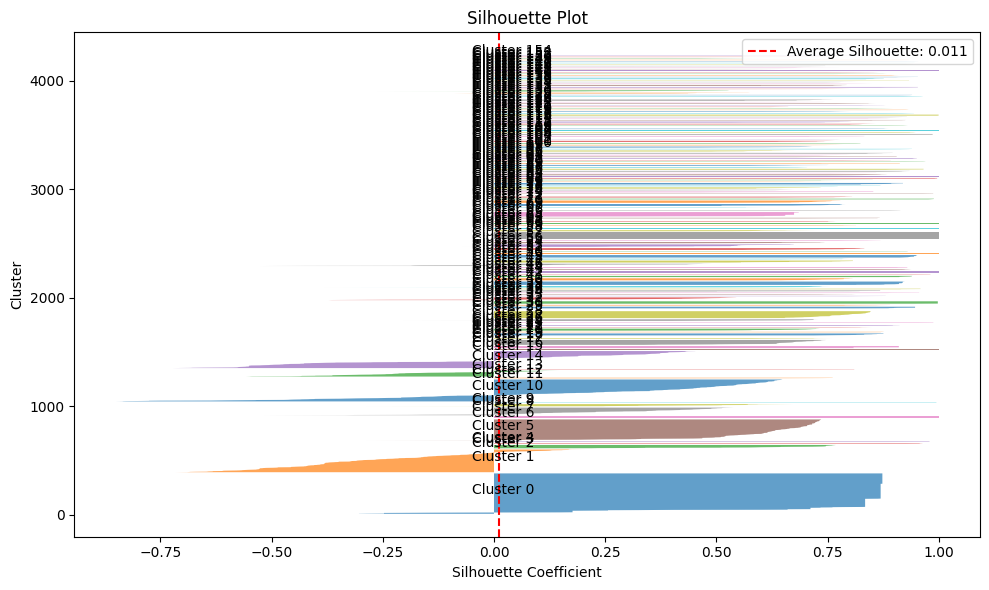

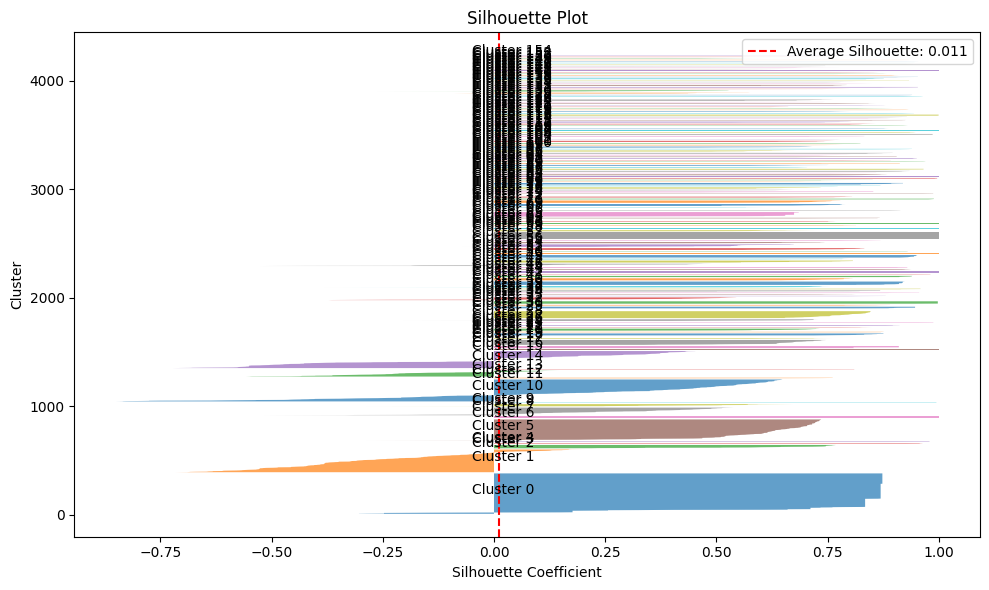

In [138]:
plot_silhouette(filtered_data_dsbcan['silhouette dbscan'].values, silhouette_score(scaled_data_filtered, best_labels_filtered, metric='euclidean'), best_labels_filtered, n_clusters=len(set(best_labels_filtered)) - (1 if -1 in best_labels_filtered else 0))

In [133]:
#Plotting with dbscan
data_sample
data_sample.groupby('cluster dbscan')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[data_sample['lat'].mean(), data_sample['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in data_sample.groupby('cluster dbscan')[['lat', 'long']].mean().iterrows():
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters

In [134]:
#Plotting with dbscan filtered cluster center
filtered_data_dsbcan
filtered_data_dsbcan.groupby('cluster dbscan')[['lat', 'long']].mean()
# Create a folium map centered around the mean latitude and longitude of the clusters
map_clusters = folium.Map(location=[filtered_data_dsbcan['lat'].mean(), filtered_data_dsbcan['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each cluster center
for cluster_label, cluster_center in filtered_data_dsbcan.groupby('cluster dbscan')[['lat', 'long']].mean().iterrows():
    folium.Marker(
        location=[cluster_center['lat'], cluster_center['long']],
        popup=f'Cluster {cluster_label}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_clusters)

map_clusters

In [139]:
#Plotting with dbscan filtered cluster center
map_clusters
# Randomly sample 1500 objects from filtered_data_dsbcan
sampled_data = filtered_data_dsbcan.sample(n=1500)

# Create a folium map centered around the mean latitude and longitude of the sampled data
map_sampled_clusters = folium.Map(location=[sampled_data['lat'].mean(), sampled_data['long'].mean()], zoom_start=12, control_scale=True)

# Add markers for each sampled data point
# Define a color palette
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add markers for each sampled data point with different colors for different clusters
for _, row in sampled_data[sampled_data['cluster dbscan'] != -1].iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f'Cluster {row["cluster dbscan"]}',
        icon=folium.Icon(color=colors[row["cluster dbscan"] % len(colors)], icon='info-sign')
    ).add_to(map_sampled_clusters)

map_sampled_clusters

## Task #5: Data mining

In [206]:
from collections import Counter
import re

dataset_cluster = {}

dataset = filtered_data_dsbcan[~filtered_data_dsbcan['title'].isna()][['title', 'cluster dbscan']]

for cluster in dataset['cluster dbscan'].unique():
    dataset_cluster[cluster] = dataset[dataset['cluster dbscan'] == cluster]

    dataset_cluster_tokens = [nltk.word_tokenize(title, 'french') for title in dataset_cluster[cluster]['title']]

    # Remove stop words in french
    stop_words = set(nltk.corpus.stopwords.words('french'))
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in stop_words] for tokens in dataset_cluster_tokens]

    # Remove stopwords in english
    stop_words = set(nltk.corpus.stopwords.words('english'))
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in stop_words] for tokens in dataset_cluster_tokens]

    # Remove symbols like '#' and '()'
    dataset_cluster_tokens = [[re.sub(r'[^\w\s]', '', token) for token in tokens] for tokens in dataset_cluster_tokens]

    # Remove empty tokens
    dataset_cluster_tokens = [[token for token in tokens if token] for tokens in dataset_cluster_tokens]

    # Remove the word 'lyon' and 'france'
    dataset_cluster_tokens = [[token for token in tokens if token.lower() not in ['lyon', 'france']] for tokens in dataset_cluster_tokens]

    # Flatten the list of tokenized titles
    all_tokens = [token for sublist in dataset_cluster_tokens for token in sublist]

    # Count the frequency of each word
    word_freq = Counter(all_tokens)

    # write the most common words in a dictionary
    dataset_cluster[cluster] = word_freq.most_common(5)

dataset_cluster


{0: [('Chaos', 143),
  ('Ehrmann', 101),
  ('Demeure', 88),
  ('thierry', 76),
  ('Abode', 60)],
 1: [('Jean', 19),
  ('SaintJean', 15),
  ('Cathédrale', 14),
  ('St', 11),
  ('Saint', 9)],
 -1: [('paper', 55), ('Pasted', 54), ('Parc', 36), ('dOr', 33), ('Tête', 30)],
 2: [('Jacobins', 4),
  ('Place', 3),
  ('lion', 2),
  ('20140530', 2),
  ('img_2131', 1)],
 3: [('Fourvière', 2),
  ('DSC_4565', 1),
  ('ange', 1),
  ('toit', 1),
  ('Gardens', 1)],
 4: [('Pasted', 1),
  ('paper', 1),
  ('9J9A5391', 1),
  ('9J9A5317', 1),
  ('9J9A5453', 1)],
 7: [('Fête', 6), ('Lumières', 6), ('Place', 5), ('Louis', 5), ('Pradel', 5)],
 8: [('Zombie', 5), ('Day', 5), ('Fête', 3), ('Lumières', 3), ('Grande', 2)],
 10: [('Fourvière', 40),
  ('Basilique', 26),
  ('NotreDame', 22),
  ('Dame', 13),
  ('Fourviere', 11)],
 151: [('Couple', 1),
  ('ducks', 1),
  ('IMG_20181111_164618', 1),
  ('IMG_20181111_164640', 1),
  ('Petit', 1)],
 11: [('abode', 3), ('chaos', 3), ('360', 3), ('19992019', 3), ('LITTLE', 2)]

In [182]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# Using an in-built dataset: Grocery transactions (each row represents items purchased together)
dataset = dataset_cluster_0_tokens

# Step 1: Convert the dataset into a one-hot encoded DataFrame
te = TransactionEncoder()
te_data = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)

# Step 2: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
# Step 3: Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets= 10)

# Output the results
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

C:\Users\bdosanjosg\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'